<a href="https://colab.research.google.com/github/chakravartulavinay/Airfoil_Self_Noise/blob/main/Airfoil_Self_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns

In [ ]:
URL = "/content/drive/MyDrive/AirfoilSelfNoise.csv"
data = pd.read_csv(URL)
data

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [ ]:
data = data.rename(columns = {'f':'Frequency','alpha':'Angle_of_Attack',
                              'c':'Chord_Length','U_infinity':'Free_stream_velocity',
                              'delta':'Suction_side_displacement_thickness',
                              'SSPL': 'Scaled_sound_pressure_level'})
data

,Frequency,Angle_of_Attack,Chord_Length,Free_stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [ ]:
train_data,test_data = train_test_split(data,test_size=0.4)
print(" Training Data Size: ",len(train_data))
print(" Testing Data Size: ",len(test_data))

 Training Data Size:  901
 Testing Data Size:  602


In [ ]:
train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')

In [ ]:
train_data

,Frequency,Angle_of_Attack,Chord_Length,Free_stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
902,200,15.4,0.0508,39.6,0.028259,121.783
924,800,15.4,0.0508,31.7,0.028985,125.555
1084,400,9.5,0.0254,39.6,0.004498,121.154
979,10000,0.0,0.0254,55.5,0.000412,134.563
332,500,4.0,0.2286,39.6,0.004738,127.039
...,...,...,...,...,...,...
753,1250,0.0,0.0508,39.6,0.000792,129.148
1459,315,12.3,0.1016,31.7,0.041876,124.717
762,10000,0.0,0.0508,39.6,0.000792,125.998
1453,3150,12.3,0.1016,39.6,0.040827,113.055


In [ ]:
train_data.isna().sum()

Frequency                              0
Angle_of_Attack                        0
Chord_Length                           0
Free_stream_velocity                   0
Suction_side_displacement_thickness    0
Scaled_sound_pressure_level            0
dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901 entries, 902 to 1111
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Frequency                            901 non-null    int64  
 1   Angle_of_Attack                      901 non-null    float64
 2   Chord_Length                         901 non-null    float64
 3   Free_stream_velocity                 901 non-null    float64
 4   Suction_side_displacement_thickness  901 non-null    float64
 5   Scaled_sound_pressure_level          901 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 49.3 KB


In [ ]:
train_data.describe()

,Frequency,Angle_of_Attack,Chord_Length,Free_stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
count,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000
mean,2878.296337,6.762819,0.132976,51.136071,0.010910,125.005093
std,3087.073661,5.839968,0.091079,15.632615,0.012924,6.822356
min,200.000000,0.000000,0.025400,31.700000,0.000401,104.130000
25%,800.000000,2.000000,0.050800,39.600000,0.002451,120.228000
50%,1600.000000,5.400000,0.101600,39.600000,0.004783,125.998000
75%,4000.000000,9.900000,0.228600,71.300000,0.015048,130.239000
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.158000


In [ ]:
train_data.corr()

,Frequency,Angle_of_Attack,Chord_Length,Free_stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
Frequency,1.000000,-0.271748,0.032570,0.151415,-0.234233,-0.419773
Angle_of_Attack,-0.271748,1.000000,-0.506341,0.052997,0.750947,-0.150130
Chord_Length,0.032570,-0.506341,1.000000,0.006096,-0.209885,-0.228032
Free_stream_velocity,0.151415,0.052997,0.006096,1.000000,-0.000996,0.147477
Suction_side_displacement_thickness,-0.234233,0.750947,-0.209885,-0.000996,1.000000,-0.281090
Scaled_sound_pressure_level,-0.419773,-0.150130,-0.228032,0.147477,-0.281090,1.000000


<Axes: title={'center': 'Heapmap'}>

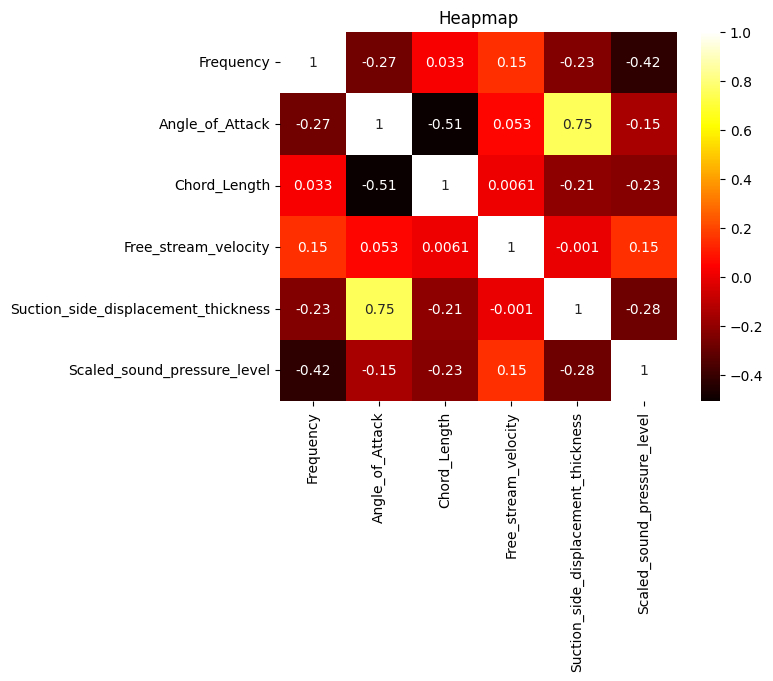

In [ ]:
plt.title('Heapmap')
sns.heatmap(train_data.corr(),cmap='hot',annot=True)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(train_data[['Frequency','Angle_of_Attack','Chord_Length',
              'Free_stream_velocity','Suction_side_displacement_thickness']],
        train_data.Scaled_sound_pressure_level)

LinearRegression()

In [ ]:
reg.predict([[16000,0,0.3048,55.5,0.002663]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([106.22477004])

In [ ]:
testing_data = test_data.drop(columns=['Scaled_sound_pressure_level'])
testing_data

,Frequency,Angle_of_Attack,Chord_Length,Free_stream_velocity,Suction_side_displacement_thickness
1207,3150,17.4,0.0254,31.7,0.017663
1157,2000,17.4,0.0254,71.3,0.016104
131,800,3.0,0.3048,39.6,0.004957
918,200,15.4,0.0508,31.7,0.028985
137,3150,3.0,0.3048,39.6,0.004957
...,...,...,...,...,...
731,3150,0.0,0.0508,71.3,0.000740
768,2000,0.0,0.0508,31.7,0.000812
221,1250,0.0,0.2286,39.6,0.002535
258,400,2.0,0.2286,55.5,0.003135


In [ ]:
predicted = reg.predict(testing_data)

In [ ]:
testing_data['Scaled_sound_pressure_level'] = predicted
testing_data.to_csv('final_predicted_data.csv',index=0)

In [ ]:
y_test = test_data['Scaled_sound_pressure_level']
mse = mean_squared_error(y_test,testing_data['Scaled_sound_pressure_level'])
print(mse)

24.318762253951864


In [ ]:
r2 = r2_score(y_test,testing_data['Scaled_sound_pressure_level'])
print("R-squared:",format(r2,'.2f'))

R-squared: 0.50


In [ ]:
train_data1,test_data1 = train_test_split(data,test_size=0.3)
print(" Training Data Size: ",len(train_data1))
print(" Testing Data Size: ",len(test_data1))

 Training Data Size:  1052
 Testing Data Size:  451


In [ ]:
train_data1.to_csv('train_data1.csv')
test_data1.to_csv('test_data1.csv')

In [ ]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 662 to 1312
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Frequency                            1052 non-null   int64  
 1   Angle_of_Attack                      1052 non-null   float64
 2   Chord_Length                         1052 non-null   float64
 3   Free_stream_velocity                 1052 non-null   float64
 4   Suction_side_displacement_thickness  1052 non-null   float64
 5   Scaled_sound_pressure_level          1052 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 57.5 KB


In [ ]:
train_data1.describe()

,Frequency,Angle_of_Attack,Chord_Length,Free_stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,2936.497148,6.707129,0.138783,51.011597,0.011003,124.839897
std,3236.175717,5.907477,0.093834,15.643773,0.013087,6.865995
min,200.000000,0.000000,0.025400,31.700000,0.000401,104.130000
25%,800.000000,2.000000,0.050800,39.600000,0.002663,120.152250
50%,1600.000000,5.300000,0.152400,39.600000,0.004850,125.699000
75%,4000.000000,9.900000,0.228600,71.300000,0.015048,130.086750
max,20000.000000,22.200000,0.304800,71.300000,0.058411,139.918000


In [ ]:
testing_data1 = test_data1.drop(columns=['Scaled_sound_pressure_level'])
testing_data1

,Frequency,Angle_of_Attack,Chord_Length,Free_stream_velocity,Suction_side_displacement_thickness
657,3150,9.9,0.1524,55.5,0.020844
1005,12500,0.0,0.0254,31.7,0.000439
115,800,3.0,0.3048,55.5,0.004525
1009,3150,4.8,0.0254,71.3,0.000849
738,800,0.0,0.0508,55.5,0.000762
...,...,...,...,...,...
390,200,7.3,0.2286,71.3,0.010440
1430,630,12.3,0.1016,55.5,0.036823
16,800,0.0,0.3048,55.5,0.002831
31,315,0.0,0.3048,39.6,0.003101


In [ ]:
predicted = reg.predict(testing_data1)

In [ ]:
testing_data1['Scaled_sound_pressure_level'] = predicted
testing_data1.to_csv('final_predicted_data1.csv',index=0)

In [ ]:
y_test = test_data1['Scaled_sound_pressure_level']
mse = mean_squared_error(y_test,testing_data1['Scaled_sound_pressure_level'])
print(mse)

23.093968828970144


In [ ]:
r2 = r2_score(y_test,testing_data1['Scaled_sound_pressure_level'])
print("R-squared:",format(r2,'.2f'))

R-squared: 0.53


In [ ]:
train_data2,test_data2 = train_test_split(data,test_size=0.25)
print(" Training Data Size: ",len(train_data2))
print(" Testing Data Size: ",len(test_data2))

 Training Data Size:  1127
 Testing Data Size:  376


In [ ]:
train_data2.to_csv('train_data2.csv')
test_data2.to_csv('test_data2.csv')

In [ ]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 857 to 1432
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Frequency                            1127 non-null   int64  
 1   Angle_of_Attack                      1127 non-null   float64
 2   Chord_Length                         1127 non-null   float64
 3   Free_stream_velocity                 1127 non-null   float64
 4   Suction_side_displacement_thickness  1127 non-null   float64
 5   Scaled_sound_pressure_level          1127 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 61.6 KB


In [ ]:
train_data2.describe()

,Frequency,Angle_of_Attack,Chord_Length,Free_stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,2769.622893,6.604791,0.137074,50.829902,0.010849,125.069983
std,3012.925282,5.887291,0.093457,15.583750,0.013151,6.782532
min,200.000000,0.000000,0.025400,31.700000,0.000401,104.130000
25%,800.000000,2.000000,0.050800,39.600000,0.002483,120.375500
50%,1600.000000,5.300000,0.101600,39.600000,0.004783,125.872000
75%,4000.000000,9.900000,0.228600,71.300000,0.014072,130.184000
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [ ]:
testing_data2 = test_data2.drop(columns=['Scaled_sound_pressure_level'])
testing_data2

,Frequency,Angle_of_Attack,Chord_Length,Free_stream_velocity,Suction_side_displacement_thickness
1277,5000,0.0,0.1016,39.6,0.001463
1187,1000,17.4,0.0254,39.6,0.017221
110,8000,3.0,0.3048,71.3,0.004257
555,500,5.4,0.1524,55.5,0.004333
1451,2000,12.3,0.1016,39.6,0.040827
...,...,...,...,...,...
1239,5000,22.2,0.0254,39.6,0.022903
342,5000,4.0,0.2286,39.6,0.004738
688,2500,9.9,0.1524,31.7,0.025278
1018,1600,4.8,0.0254,55.5,0.000873


In [ ]:
predicted = reg.predict(testing_data2)

In [ ]:
testing_data2['Scaled_sound_pressure_level'] = predicted
testing_data2.to_csv('final_predicted_data2.csv',index=0)

In [ ]:
y_test = test_data2['Scaled_sound_pressure_level']
mse = mean_squared_error(y_test,testing_data2['Scaled_sound_pressure_level'])
print(mse)

21.564459442023594


In [ ]:
r2 = r2_score(y_test,testing_data2['Scaled_sound_pressure_level'])
print("R-squared:",format(r2,'.2f'))

R-squared: 0.58


In [ ]:
train_data3,test_data3 = train_test_split(data,test_size=0.2)
print(" Training Data Size: ",len(train_data3))
print(" Testing Data Size: ",len(test_data3))

 Training Data Size:  1202
 Testing Data Size:  301


In [ ]:
train_data3.to_csv('train_data3.csv')
test_data3.to_csv('test_data3.csv')

In [ ]:
train_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 1089 to 1155
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Frequency                            1202 non-null   int64  
 1   Angle_of_Attack                      1202 non-null   float64
 2   Chord_Length                         1202 non-null   float64
 3   Free_stream_velocity                 1202 non-null   float64
 4   Suction_side_displacement_thickness  1202 non-null   float64
 5   Scaled_sound_pressure_level          1202 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 65.7 KB


In [ ]:
train_data3.describe()

,Frequency,Angle_of_Attack,Chord_Length,Free_stream_velocity,Suction_side_displacement_thickness,Scaled_sound_pressure_level
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,2881.289517,6.735025,0.136847,50.894759,0.011006,124.795008
std,3140.381765,5.944677,0.092713,15.643352,0.012926,6.922809
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002514,120.150750
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.718000
75%,4000.000000,9.900000,0.228600,71.300000,0.015048,129.976000
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [ ]:
testing_data3 = test_data3.drop(columns=['Scaled_sound_pressure_level'])
testing_data3

,Frequency,Angle_of_Attack,Chord_Length,Free_stream_velocity,Suction_side_displacement_thickness
919,250,15.4,0.0508,31.7,0.028985
458,2000,0.0,0.1524,71.3,0.001599
422,200,7.3,0.2286,39.6,0.012348
540,12500,2.7,0.1524,39.6,0.002948
217,500,0.0,0.2286,39.6,0.002535
...,...,...,...,...,...
1340,4000,3.3,0.1016,31.7,0.002514
111,10000,3.0,0.3048,71.3,0.004257
712,400,12.6,0.1524,39.6,0.058411
20,2000,0.0,0.3048,55.5,0.002831


In [ ]:
predicted = reg.predict(testing_data3)

In [ ]:
testing_data3['Scaled_sound_pressure_level'] = predicted
testing_data3.to_csv('final_predicted_data3.csv',index=0)

In [ ]:
y_test = test_data3['Scaled_sound_pressure_level']
mse = mean_squared_error(y_test,testing_data3['Scaled_sound_pressure_level'])
print(mse)

20.71130696779407


In [ ]:
r2 = r2_score(y_test,testing_data3['Scaled_sound_pressure_level'])
print("R-squared:",format(r2,'.2f'))

R-squared: 0.55
